## 기본세팅

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import pprint

# 기본 세팅
pp = pprint.PrettyPrinter(indent=4)
api_key = 'RGAPI-aa5e7555-a973-4ab4-af69-f5bf2e428cb3'

request_header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": "RGAPI-aa5e7555-a973-4ab4-af69-f5bf2e428cb3"
}

In [ ]:
# SUMMONERV4 -> 3번째 by-names -> hide on bush 검색

sohwan = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" +'hide on bush' +'?api_key=' + api_key
r = requests.get(sohwan)
r.json()

{'id': 'PWtC2C7Bf7e_m2ny9oRugFmpXwYUHrWlU9WExwzPSvs5xg',
 'accountId': 'TM9ljSrPW8p4qukqFGnQM9apCQ8kj8j_nJb3gIn5JqRn',
 'puuid': 'FXFjanzviB4gGD4RAlU7IohWE3G6H55hjse1Zi2_jofHcdm_7jBY1bT5P_XlOQycmwSkU_BtAqtV-g',
 'name': 'Hide on bush',
 'profileIconId': 6,
 'revisionDate': 1694060441391,
 'summonerLevel': 693}

In [ ]:
# LEAGUEV4 -> 2번째 by-summoner -> hide on bush의 id로 검색

tier_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + r.json()['id'] +'?api_key=' + api_key
r2  = requests.get(tier_url)
r2.json()

[{'leagueId': '3ec8a0d2-97b8-3b2c-9d34-d93c53a15730',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'GRANDMASTER',
  'rank': 'I',
  'summonerId': 'PWtC2C7Bf7e_m2ny9oRugFmpXwYUHrWlU9WExwzPSvs5xg',
  'summonerName': 'Hide on bush',
  'leaguePoints': 583,
  'wins': 102,
  'losses': 80,
  'veteran': False,
  'inactive': False,
  'freshBlood': True,
  'hotStreak': False}]

In [ ]:
# SUMMONERV4 -> 3번째 by-names -> 용리꾸 검색

sohwan = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" +'용리꾸' +'?api_key=' + api_key
r = requests.get(sohwan)
r.json()

{'id': '1ma7Kn6ixw4FHSpXaXqt7dzstqUPxrhtkHDjYocFzlpHZg',
 'accountId': '5SnHTBhwAroJ3cdIqTuE9Eib35D30S6t3qNgpb5JJnhu',
 'puuid': 'zTrWsme7R3TXhV-zmTmiHJfnLOGqqPc5rm0D76Uu4PPAj_FtyF_FpgTWYuNLCX6fcPOWOPCdPyo6kQ',
 'name': '용리꾸',
 'profileIconId': 505,
 'revisionDate': 1694056164618,
 'summonerLevel': 376}

In [ ]:
# LEAGUEV4 -> 2번째 by-summoner -> 용리꾸의 id로 검색

tier_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + r.json()['id'] +'?api_key=' + api_key
r2  = requests.get(tier_url)
r2.json()

[{'leagueId': '4d1f6df3-e71a-4843-a77d-49eb78c42c79',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'SILVER',
  'rank': 'II',
  'summonerId': '1ma7Kn6ixw4FHSpXaXqt7dzstqUPxrhtkHDjYocFzlpHZg',
  'summonerName': '용리꾸',
  'leaguePoints': 26,
  'wins': 5,
  'losses': 2,
  'veteran': False,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False}]

In [ ]:
# PuuID로 매치ID 검색
def match_v5_get_list_match_id(puuid, start, count):
    url = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count={count}"
    return requests.get(url, headers=request_header).json()

# 최근 10경기 매치 아이디 검색
pp.pprint(match_v5_get_list_match_id("zTrWsme7R3TXhV-zmTmiHJfnLOGqqPc5rm0D76Uu4PPAj_FtyF_FpgTWYuNLCX6fcPOWOPCdPyo6kQ", 0, 10))

# 매치ID 히스토리 검색
def match_v5_get_match_history(matchId):
    url = f"https://asia.api.riotgames.com/lol/match/v5/matches/{matchId}"
    return requests.get(url, headers=request_header).json()

# 매치ID의 히스토리 불러오기
data = match_v5_get_match_history("KR_6690150509")

In [ ]:
# 매치 히스토리 Gold_Earned

info = data['info']
participants = info['participants']

user_gold = {}

for user in participants:
    user_name = user['championName']
    gold_earned = user['goldEarned']
    user_gold[user_name] = gold_earned

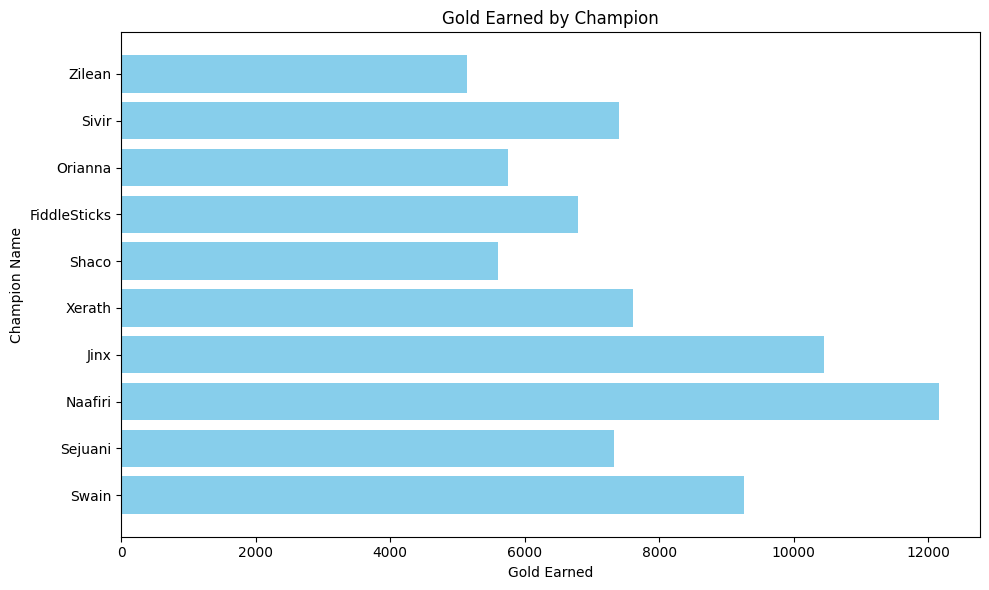

In [ ]:
champions = list(user_gold.keys())
gold_earned = list(user_gold.values())

plt.figure(figsize=(10, 6))
plt.barh(champions, gold_earned, color='skyblue')
plt.xlabel('Gold Earned')
plt.ylabel('Champion Name')
plt.title('Gold Earned by Champion')

plt.tight_layout()
plt.show()

In [ ]:
# 매치 히스토리 Level

user_level = {}

for user in participants:
    user_name = user['championName']
    champ_level = user['champLevel']
    user_level[user_name] = champ_level

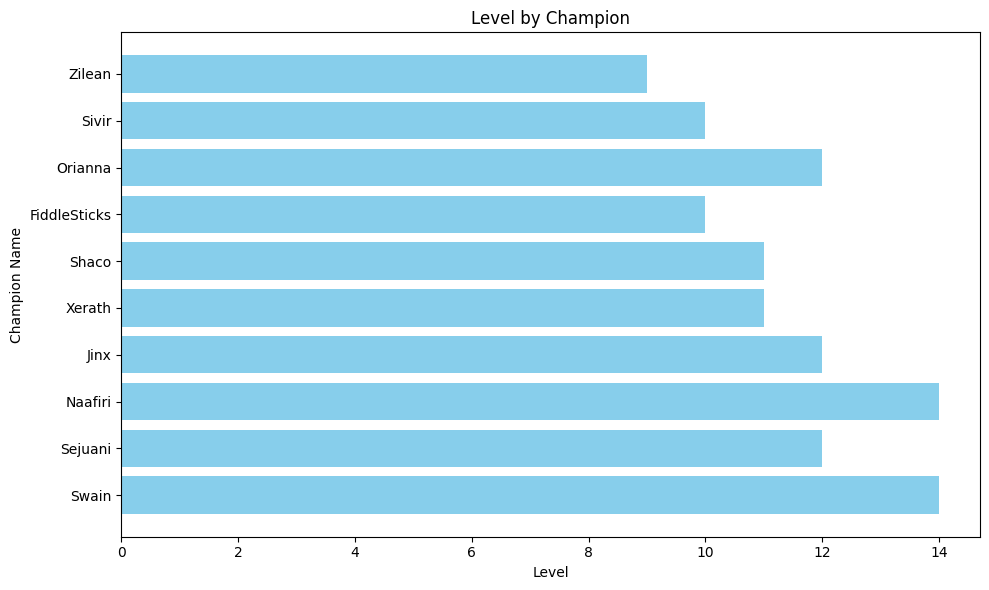

In [ ]:
champions = list(user_level.keys())
level = list(user_level.values())

plt.figure(figsize=(10, 6))
plt.barh(champions, level, color='skyblue')
plt.xlabel('Level')
plt.ylabel('Champion Name')
plt.title('Level by Champion')

plt.tight_layout()
plt.show()

In [ ]:
# 요소의 숫자

len(participants[0])

130

In [ ]:
participants[0]

{'allInPings': 0,
 'assistMePings': 1,
 'assists': 5,
 'baitPings': 0,
 'baronKills': 0,
 'basicPings': 0,
 'bountyLevel': 6,
 'challenges': {'12AssistStreakCount': 0,
  'abilityUses': 203,
  'acesBefore15Minutes': 0,
  'alliedJungleMonsterKills': 0,
  'baronTakedowns': 0,
  'blastConeOppositeOpponentCount': 0,
  'bountyGold': 0,
  'buffsStolen': 0,
  'completeSupportQuestInTime': 0,
  'controlWardTimeCoverageInRiverOrEnemyHalf': 0.756122134244829,
  'controlWardsPlaced': 5,
  'damagePerMinute': 805.9861598712738,
  'damageTakenOnTeamPercentage': 0.3411113685178734,
  'dancedWithRiftHerald': 0,
  'deathsByEnemyChamps': 1,
  'dodgeSkillShotsSmallWindow': 0,
  'doubleAces': 0,
  'dragonTakedowns': 1,
  'earliestDragonTakedown': 877.0130078999999,
  'earlyLaningPhaseGoldExpAdvantage': 0,
  'effectiveHealAndShielding': 0,
  'elderDragonKillsWithOpposingSoul': 0,
  'elderDragonMultikills': 0,
  'enemyChampionImmobilizations': 38,
  'enemyJungleMonsterKills': 0,
  'epicMonsterKillsNearEnemyJ

In [ ]:
# 매치ID 타임라인 검색
def match_v5_get_match_timeline(matchId):
    url = f"https://asia.api.riotgames.com/lol/match/v5/matches/{matchId}/timeline"
    return requests.get(url, headers=request_header).json()

data_timeline = match_v5_get_match_timeline("KR_6690150509")

In [ ]:
data_timeline

In [ ]:
timeline_info = data_timeline['info']

In [ ]:
timeline_info['frames']

[{'events': [{'realTimestamp': 1694054819460,
    'timestamp': 0,
    'type': 'PAUSE_END'}],
  'participantFrames': {'1': {'championStats': {'abilityHaste': 0,
     'abilityPower': 0,
     'armor': 26,
     'armorPen': 0,
     'armorPenPercent': 0,
     'attackDamage': 25,
     'attackSpeed': 100,
     'bonusArmorPenPercent': 0,
     'bonusMagicPenPercent': 0,
     'ccReduction': 0,
     'cooldownReduction': 0,
     'health': 595,
     'healthMax': 595,
     'healthRegen': 0,
     'lifesteal': 0,
     'magicPen': 0,
     'magicPenPercent': 0,
     'magicResist': 30,
     'movementSpeed': 330,
     'omnivamp': 0,
     'physicalVamp': 0,
     'power': 468,
     'powerMax': 468,
     'powerRegen': 0,
     'spellVamp': 0},
    'currentGold': 500,
    'damageStats': {'magicDamageDone': 0,
     'magicDamageDoneToChampions': 0,
     'magicDamageTaken': 0,
     'physicalDamageDone': 0,
     'physicalDamageDoneToChampions': 0,
     'physicalDamageTaken': 0,
     'totalDamageDone': 0,
     'tota